# Mass Shootings in USA (1982-2020) - Exploratory Analysis

Analysis made on: 4 March 2020 by Andra Maraciuc

## About this dataset

This analysis is based on data on US Mass Shootings provided by Mother Jones and it covers an in-depth look at mass shootings cases from 1982 to 2020 (February).

How Mother Jones defines mass shootings:

"Our research focused on <b>indiscriminate rampages in public places resulting in four or more victims killed by the attacker</b>. We exclude shootings stemming from more conventionally motivated crimes such as armed robbery or gang violence. (Or in which the perpetrators have not been identified.)"<br>
<br>
Source: https://www.motherjones.com/politics/2012/07/mass-shootings-map/ 

#### Dataset used (where to download):

- US Mass Shootings, 1982-2020: Data From Mother Jones’ Investigation (download link): https://www.motherjones.com/politics/2012/12/mass-shootings-mother-jones-full-data/

### What includes (after cleanup):

- <b>case</b>: the name of the shooting event
- <b>date</b>: date of the shooting
- <b>summary</b>: short description of the shooting
- <b>fatalities</b>: the number of people who have died <i>(doesn't include the attacker)</i>
- <b>injured</b>: the number of people who have been injured <i>(doesn't include the attacker)</i>
- <b>total_victims</b>: total number of cassualties (fatalities and injured together)
- <b>shooting_area</b>: the area where the incident happened (school, workplace, market etc) 
- <b>age</b>: age of the shooter
- <b>prior_signs_mental_health_issues</b>: information on if the perpator had mental health issues
- <b>weapons_obtained_legally</b>: shows if the shooter obtained the weapons legally or not
- <b>weapon_type</b>: type of weapon used in shooting
- <b>weapon_details</b>: details about the weapon
- <b>race</b>: the race of the shooter
- <b>gender</b>: the gender of the shooter
- <b>latitude</b>: latitude coordonates of the attack
- <b>longitude</b>: longitude coordonates of the attack
- <b>type</b>: type of shooting (mass or spree)
- <b>year</b>: year of the shooting
- <b>state</b>: full state name where the shooting happened
- <b>state_code</b>: two letter state code
- <b>city</b>: the city where the shooting took place

## Research Questions to Answer

- Are mass shootings on the rise? 
- What state/city had the most victims from mass shootings?
- What states have the highest number of mass shootings?
- What was the year with most mass shootings?
- What were the deadliest shootings in US?
- Are most mass killers males or females?
- Were the weapons used in shootings obtained legally?
- What is the age of the youngest / oldest shooter?
- What is the race of the shooters?
- How many school shootings have been since 1982?

### Rough Breakdown of Tasks

#### 1. Data Preparation and Cleaning
Load the dataset, clean the dataset, deal with missing values, drop columns, change data types, add new relevant columns.
#### 2. Data Exploration and Visualization
Analyze and explore the data to get answers to our research questions. Make visualizations (bar graphs, line graphs, pie charts, waffle charts, geo maps, histograms) of our data findings that will help us get a visual idea of patterns and trends.

***

# Data Preparation and Cleaning

#### Importing necessary Python modules

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from pywaffle import Waffle
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go 
import plotly.io as pio
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.offline as pyo

init_notebook_mode(connected=True)

#### Load the dataset

In [3]:
df = pd.read_csv('Data\Mother_Jones_Mass_Shootings_Database_1982_2020.csv')

In [4]:
df.head()

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year
0,Molson Coors shooting,"Milwaukee, Wisconsin",2/26/20,"Anthony Ferrill, 51, an employee armed with tw...",5,0,5,Workplace,51,-,...,-,Black,M,https://www.jsonline.com/story/news/local/2020...,-,-,43.044511,-87.962537,Mass,2020
1,Jersey City kosher market shooting,"Jersey City, New Jersey",12/10/19,"David N. Anderson, 47, and Francine Graham, 50...",4,3,7,Other,-,-,...,-,Black,-,https://www.nytimes.com/2019/12/15/nyregion/je...,-,-,40.707363,-74.083609,Spree,2019
2,Pensacola Naval base shooting,"Pensacola, Florida",12/6/19,"Ahmed Mohammed al-Shamrani, A Saudi Arabian mi...",3,8,11,Military,-,-,...,-,-,M,https://www.washingtonpost.com/national-securi...,-,-,30.364707,-87.288567,Mass,2019
3,Odessa-Midland shooting spree,"Odessa, Texas",8/31/19,"Seth A. Ator, 36, fired at police officers who...",7,25,32,Other,36,yes,...,-,White,M,https://www.washingtonpost.com/politics/5-kill...,https://www.nytimes.com/2019/09/02/us/texas-gu...,-,31.925974,-102.279600,Spree,2019
4,Dayton entertainment district shooting,"Dayton, Ohio",8/4/19,"Connor Betts, 24, died during the attack, foll...",9,27,36,Other,24,-,...,"AR-15-style rifle, with a 100-round capacity a...",White,M,https://www.nytimes.com/2019/08/04/us/dayton-o...,-,-,39.757312,-84.184947,Mass,2019


### 1. Dropping columns we don't need

In [5]:
# First let's take a look at the columns we have
df.columns

Index(['case', 'location', 'date', 'summary', 'fatalities', 'injured',
       'total_victims', 'location.1', 'age_of_shooter',
       'prior_signs_mental_health_issues', 'mental_health_details',
       'weapons_obtained_legally', 'where_obtained', 'weapon_type',
       'weapon_details', 'race', 'gender', 'sources', 'mental_health_sources',
       'sources_additional_age', 'latitude', 'longitude', 'type', 'year'],
      dtype='object')

In [6]:
# Now lets drop those that we don't need
df = df.drop(columns=['sources', 'mental_health_sources', 'mental_health_details','where_obtained',
       'sources_additional_age'])

### 2. Checking data types

In [7]:
df.dtypes

case                                 object
location                             object
date                                 object
summary                              object
fatalities                            int64
injured                               int64
total_victims                         int64
location.1                           object
age_of_shooter                       object
prior_signs_mental_health_issues     object
weapons_obtained_legally             object
weapon_type                          object
weapon_details                       object
race                                 object
gender                               object
latitude                            float64
longitude                           float64
type                                 object
year                                  int64
dtype: object

 We will need to change the 'age_of_shooter' data type to int.

### 3. Check for missing data

In [8]:
# Find NAN
nan_df = df[df.isna().any(axis=1)]
display(nan_df.head())

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,weapons_obtained_legally,weapon_type,weapon_details,race,gender,latitude,longitude,type,year


### 4. Cleaning 'age_of_shooter' column

We encountered an error when trying to change the 'age_of_shooter' data type, showing that we have missing data in our column. Let's fix that.

In [9]:
# Find missing data searching for '-' values
df.loc[df['age_of_shooter'] == '-']

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,weapons_obtained_legally,weapon_type,weapon_details,race,gender,latitude,longitude,type,year
1,Jersey City kosher market shooting,"Jersey City, New Jersey",12/10/19,"David N. Anderson, 47, and Francine Graham, 50...",4,3,7,Other,-,-,-,-,-,Black,-,40.707363,-74.083609,Spree,2019
2,Pensacola Naval base shooting,"Pensacola, Florida",12/6/19,"Ahmed Mohammed al-Shamrani, A Saudi Arabian mi...",3,8,11,Military,-,-,-,semiautomatic handgun,-,-,M,30.364707,-87.288567,Mass,2019


We've found <b>two missing values</b> at index 1 and 2, in the 'age_of_shooter' column. We could drop them or replace them with a different value using a median/mean.

In this particular case, the missing data is public and can be found online. This will allow us to fill the missing values with real data, accurately.
 
- <b>Case 1</b>: "David Nathaniel Anderson (age 47) and his girlfriend Francine Graham (age 50)". <br> <i>Source: https://en.wikipedia.org/wiki/2019_Jersey_City_shooting</i>

- <b>Case 2</b>: "The FBI identified the gunman as Mohammed Saeed Alshamrani, 21". <br> <i>Source: https://en.wikipedia.org/wiki/Naval_Air_Station_Pensacola_shooting</i>

#### Replacing missing values with accurate data

In [10]:
df.loc[1, 'age_of_shooter'] = 48 #the average age of the 2 shooters
df.loc[2, 'age_of_shooter'] = 21

#### Convert data type from "object" to "int "

The data type of the 'age_of_shooter' column is set as "object". We need to convert the columns data type from object to int using the.astype() function. 

In [11]:
df.age_of_shooter = df.age_of_shooter.astype(int)

In [12]:
df.dtypes

case                                 object
location                             object
date                                 object
summary                              object
fatalities                            int64
injured                               int64
total_victims                         int64
location.1                           object
age_of_shooter                        int32
prior_signs_mental_health_issues     object
weapons_obtained_legally             object
weapon_type                          object
weapon_details                       object
race                                 object
gender                               object
latitude                            float64
longitude                           float64
type                                 object
year                                  int64
dtype: object

#### Renaming "age_of_shooter" column to "age"

In [13]:
df.rename(columns={'age_of_shooter':'age'},inplace=True)

## 5. Cleaning 'gender' column

The original breakdown of number of mass shootings by gender:

In [14]:
df.gender.value_counts()

Male             70
M                43
Female            2
-                 1
F                 1
Male & Female     1
Name: gender, dtype: int64

We need to clean the data so at the end to remain with only these 3 variables representing gender: "Male", "Female" and "Male & Female".

In [15]:
#replace "M","F" values with "Male", "Female" to avoid inconsistencies
df.replace('M','Male', inplace=True)
df.replace('F','Female', inplace=True)

#### Find missing gender value:

In [16]:
df.loc[df['gender'] == '-']

,case,location,date,summary,fatalities,injured,total_victims,location.1,age,prior_signs_mental_health_issues,weapons_obtained_legally,weapon_type,weapon_details,race,gender,latitude,longitude,type,year
1,Jersey City kosher market shooting,"Jersey City, New Jersey",12/10/19,"David N. Anderson, 47, and Francine Graham, 50...",4,3,7,Other,48,-,-,-,-,Black,-,40.707363,-74.083609,Spree,2019


Reading the summary, it is clear that the attack was made by two shooters, a male and female. We can safely replace "-" with "Male & Female"

In [17]:
#replace missing gender values 
df.loc[1, 'gender'] = 'Male & Female' 

#### Final gender breakdown after cleanup:

In [18]:
df.gender.value_counts()

Male             113
Female             3
Male & Female      2
Name: gender, dtype: int64

## 6. Cleaning 'race' column

The original breakdown of number of mass shootings by race:

In [19]:
df.race.value_counts()

white              41
White              23
Black              12
Latino             10
black               9
Asian               8
-                   5
Other               5
Native American     3
White               1
unclear             1
Name: race, dtype: int64

We need to clean the values, so at the end to remain with 7 variables representing the following ethnicities: "White", "Black", "Latino", "Asian", "Native American", "Other", "Unknown".

In [20]:
#replacing values
df.replace('white','White', inplace=True)
df.replace('black','Black', inplace=True)
df.replace('White ','White', inplace=True) #string with a trailing white space
df.replace('-','Other', inplace=True)
df.replace('unclear','Unknown', inplace=True)

#### Final race breakdown after cleanup:

In [21]:
df.race.value_counts()

White              65
Black              21
Latino             10
Other              10
Asian               8
Native American     3
Unknown             1
Name: race, dtype: int64

## 7. Cleaning "location" column

The original breakdown of number of mass shootings by location:

In [22]:
df.location.value_counts()

Orlando, Florida                        2
Colorado Springs, Colorado              2
Fort Hood, Texas                        2
San Francisco, California               2
Dallas, Texas                           2
                                       ..
Fairchild Air Force Base, Washington    1
Red Lake, Minnesota                     1
San Ysidro, California                  1
Virginia Beach, Virginia                1
Washington, D.C.                        1
Name: location, Length: 110, dtype: int64

It would be helpful to split this data and <b>create two additional columns</b> one representing the <b>"city"</b>, while the other the <b>"state"</b>. This will help us analyze the data better and create valuable visualizations.

## 8. Adding a 'state' column:

In [23]:
# Split the location values by comma using a lambda function
df['state'] = df.location.apply(lambda x: x.split(',')[1])

In [24]:
df.state.value_counts().sort_values(ascending=False)

 California        20
 Florida           12
 Texas             11
 Washington         7
 Colorado           6
 Pennsylvania       5
 Wisconsin          5
 Ohio               4
 New York           4
 Illinois           4
 Connecticut        3
 Maryland           3
 Nevada             2
 Georgia            2
 Tennessee          2
 South Carolina     2
 North Carolina     2
 Oregon             2
 Virginia           2
 Minnesota          2
 Michigan           2
 Kentucky           2
 New Jersey         1
 Mississippi        1
 Arizona            1
 Utah               1
 Kansas             1
 D.C.               1
 Missouri           1
 Oklahoma           1
 Massachusetts      1
 Hawaii             1
 Nebraska           1
 Arkansas           1
 Lousiana           1
 Iowa               1
Name: state, dtype: int64

#### Remove whitespaces from all the state values:

In [25]:
df['state'] = df.state.str.strip()

## 9. Adding a state code column

To add column with the U.S. state abbreviations we will need a dictionary that we will use to "translate" the states' full-names to two letter acronyms. We will obtain this result by using the <b>.map()</b> function.

#### Dictionary translating full name US states to two-letters state abbreviations:

In [26]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'D.C.': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

Create a 'state_code' column by mapping 'state' to 'us_state_abbrev':

In [27]:
df['state_code'] = df['state'].map(us_state_abbrev)

<b>Final conversion:</b>

In [28]:
df[['state','state_code']]

,state,state_code
0,Wisconsin,WI
1,New Jersey,NJ
2,Florida,FL
3,Texas,TX
4,Ohio,OH
...,...,...
113,Florida,FL
114,Oklahoma,OK
115,California,CA
116,Texas,TX


#### Checking to see if all the states were converted to state codes

We'll count the number of values in df.state and compare it to the number of values in df.state_code. 

- If they're equal <i>(result is True)</i>, then the conversion was a success.<br>

- If the result is False, then some values weren't converted and we might have to deal with some missing/wrong data.

In [29]:
df.state.count() == df.state_code.count()

False

In [30]:
df.state.count()

118

In [31]:
df.state_code.count()

117

#### 1 value wasn't converted.

Let's find the value that couldn't be converted 

In [32]:
# Check for NaN values
df.loc[df['state_code'].isna()]

,case,location,date,summary,fatalities,injured,total_victims,location.1,age,prior_signs_mental_health_issues,...,weapon_type,weapon_details,race,gender,latitude,longitude,type,year,state,state_code
35,Baton Rouge police shooting,"Baton Rouge, Lousiana",7/17/2016,"Gavin Long, 29, a former Marine who served in ...",3,3,6,Other,29,Yes,...,Two semiautomatic rifles; one semiautomatic ha...,"IWI Tavor SAR 5.56 caliber rifle, Springfield ...",Black,Male,30.433601,-91.081403,Spree,2016,Lousiana,NaN


We have 1 instance where the the state was <b> not converted due to a typo </b> ('Lousiana' instead of 'Louisiana'). Let's fix that.

In [33]:
#replace Lousiana with Louisiana
df.state.replace('Lousiana','Louisiana', inplace=True)

In [34]:
df['state_code'] = df['state'].map(us_state_abbrev)

In [35]:
df.state.count() == df.state_code.count()

True

Succes!

## 10. Add a city column

In [36]:
#using lambda split location by comma and keep the first string which represents the city
df['city'] = df.location.apply(lambda x: x.split(',')[0])
df['city'] = df.city.str.strip() #remove whitespaces

In [37]:
df[['state','state_code','city']]

,state,state_code,city
0,Wisconsin,WI,Milwaukee
1,New Jersey,NJ,Jersey City
2,Florida,FL,Pensacola
3,Texas,TX,Odessa
4,Ohio,OH,Dayton
...,...,...,...
113,Florida,FL,Palm Bay
114,Oklahoma,OK,Edmond
115,California,CA,San Ysidro
116,Texas,TX,Dallas


## 11. Cleaning and exploring 'location.1' column

'location.1' does not sufficently describe the data. Let's rename it to a name that's easier to understand.

### Rename column to 'shooting_area'

In [38]:
df.rename(columns={'location.1':'shooting_area'}, inplace=True)

The breakdown of 'shooting_area':

In [39]:
df.shooting_area.value_counts()

Other            46
Workplace        38
School           17
Military          6
Religious         6
Other\r\n         3
\r\nWorkplace     1
Airport           1
Name: shooting_area, dtype: int64

In [40]:
df[['case','summary','shooting_area']]

,case,summary,shooting_area
0,Molson Coors shooting,"Anthony Ferrill, 51, an employee armed with tw...",Workplace
1,Jersey City kosher market shooting,"David N. Anderson, 47, and Francine Graham, 50...",Other
2,Pensacola Naval base shooting,"Ahmed Mohammed al-Shamrani, A Saudi Arabian mi...",Military
3,Odessa-Midland shooting spree,"Seth A. Ator, 36, fired at police officers who...",Other
4,Dayton entertainment district shooting,"Connor Betts, 24, died during the attack, foll...",Other
...,...,...,...
113,Shopping centers spree killings,"Retired librarian William Cruse, 59, was paran...",Other
114,United States Postal Service shooting,"Postal worker Patrick Sherrill, 44, opened fir...",Workplace
115,San Ysidro McDonald's massacre,"James Oliver Huberty, 41, opened fire in a McD...",Other
116,Dallas nightclub shooting,"Abdelkrim Belachheb, 39, opened fire at an ups...",Other


After analyzing the descriptions of the shootings, we can replace some of the 'Other' values with more relevant data and find some incident location patterns we can use. 

#### Replace some 'other' values with more specific "incident areas"

In [41]:
df.shooting_area.replace('Other\n','Other', inplace=True)
df.shooting_area.replace('school','School', inplace=True)
df.shooting_area.replace('\nWorkplace','Workplace', inplace=True)
df.loc[0,'shooting_area'] = 'Market'
df.loc[5,'shooting_area'] = 'Festival'
df.loc[11,'shooting_area'] = 'Club'
df.loc[18,'shooting_area'] = 'Restaurant/Cafe'
df.loc[24,'shooting_area'] = 'Shopping Mall/Store'
df.loc[26,'shooting_area'] = 'Festival'
df.loc[33,'shooting_area'] = 'Shopping Mall/Store'
df.loc[36,'shooting_area'] = 'Club'
df.loc[51,'shooting_area'] = 'Apartment'
df.loc[53,'shooting_area'] = 'Apartment'
df.loc[59,'shooting_area'] = 'Restaurant/Cafe'
df.loc[63,'shooting_area'] = 'Restaurant/Cafe'
df.loc[66,'shooting_area'] = 'Restaurant/Cafe'
df.loc[69,'shooting_area'] = 'Nursing Home'
df.loc[73,'shooting_area'] = 'Shopping Mall/Store'
df.loc[101,'shooting_area'] = 'Restaurant/Cafe'
df.loc[114,'shooting_area'] = 'Restaurant/Cafe'
df.loc[114,'shooting_area'] = 'Club'

#### Final shooting_area breakdown after cleanup:

In [42]:
df.shooting_area.value_counts()

Other                  40
Workplace              32
School                 16
Military                5
Religious               5
Restaurant/Cafe         5
Club                    3
Shopping Mall/Store     3
Festival                2
Other\r\n               2
Apartment               2
\r\nWorkplace           1
Market                  1
Nursing Home            1
Name: shooting_area, dtype: int64

## 12. Cleaning weapons_obtained_legally

#### Original breakdown of the weapons_obtained_legally values:

In [43]:
df.weapons_obtained_legally.value_counts()

Yes                                                                                                                                    79
No                                                                                                                                     16
TBD                                                                                                                                     7
Unknown                                                                                                                                 6
Other                                                                                                                                   5
\r\nYes                                                                                                                                 2
Kelley passed federal criminal background checks; the US Air Force failed to provide information on his criminal history to the FBI     1
Yes                               

#### Replace the values with relevant data

We want to obtain a breadown containing only 3 values: "Yes", "No", "Unknown".

In [44]:
df.weapons_obtained_legally.replace('Yes ("some of the weapons were purchased legally and some of them may not have been")','Yes', inplace=True)
df.weapons_obtained_legally.replace('Kelley passed federal criminal background checks; the US Air Force failed to provide information on his criminal history to the FBI','Unknown', inplace=True)
df.weapons_obtained_legally.replace('\nYes','Yes', inplace=True)
df.weapons_obtained_legally.replace('Yes ','Yes', inplace=True)
df.weapons_obtained_legally.replace('-','Unknown', inplace=True)
df.weapons_obtained_legally.replace('Unkown','Unknown', inplace=True)
df.weapons_obtained_legally.replace('TBD','Unknown', inplace=True)
df.weapons_obtained_legally.replace('Other','Unknown', inplace=True)

#### Final weapons_obtained_legally breakdown after cleanup:

In [45]:
df.weapons_obtained_legally.value_counts()

Yes        81
Unknown    19
No         16
\r\nYes     2
Name: weapons_obtained_legally, dtype: int64

## 13. Cleaning 'prior_signs_mental_health_issues' column

#### Original breakdown:

In [46]:
df.prior_signs_mental_health_issues.value_counts()

Yes         58
Unclear     23
No          17
Other       12
TBD          5
yes          1
Unknown      1
Unclear      1
Name: prior_signs_mental_health_issues, dtype: int64

In [47]:
df.prior_signs_mental_health_issues.replace('yes', 'Yes', inplace=True)
df.prior_signs_mental_health_issues.replace('Other', 'Unknown', inplace=True)
df.prior_signs_mental_health_issues.replace('Unclear ', 'Unknown', inplace=True) #trailing whitespace
df.prior_signs_mental_health_issues.replace('Unclear', 'Unknown', inplace=True)
df.prior_signs_mental_health_issues.replace('TBD', 'Unknown', inplace=True)
df.prior_signs_mental_health_issues.replace('-', 'Unknown', inplace=True)

#### Final cleaned breakdown:

In [48]:
df.prior_signs_mental_health_issues.value_counts()

Yes        59
Unknown    42
No         17
Name: prior_signs_mental_health_issues, dtype: int64

## 14. Dropping columns we don't longer need

In [49]:
df.drop(columns=['location'],inplace=True)

---

In [50]:
#check year range
df.year.unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004, 2003, 2001, 2000, 1999, 1998,
       1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987,
       1986, 1984, 1982], dtype=int64)

***

# Data Exploration & Visualizations

## 1. Total Victims by State (1982 - 2020)

In [51]:
tvictims_by_state = df.groupby('state_code')['total_victims'].sum().sort_values(ascending=True).reset_index()
tvictims_by_state_asc = df.groupby('state_code')['total_victims'].sum().sort_values(ascending=False).reset_index()

In [52]:
print("\nStates with most victims from mass shootings:".upper())
tvictims_by_state_asc.head(5)


STATES WITH MOST VICTIMS FROM MASS SHOOTINGS:


,state_code,total_victims
0,NV,616
1,CA,299
2,TX,296
3,FL,235
4,CO,142


In [53]:
df.loc[df['state_code']=='NV']

,case,date,summary,fatalities,injured,total_victims,shooting_area,age,prior_signs_mental_health_issues,weapons_obtained_legally,...,weapon_details,race,gender,latitude,longitude,type,year,state,state_code,city
27,Las Vegas Strip massacre,10/1/17,"Stephen Craig Paddock, 64, fired a barrage of ...",58,546,604,Other,64,Unknown,Yes,...,"AR-15-style and AK-47-style rifles and ""a larg...",White,Male,36.095739,-115.171544,Mass,2017,Nevada,NV,Las Vegas
64,IHOP shooting,9/6/2011,"Eduardo Sencion, 32, opened fire at an Interna...",5,7,12,Other,32,Yes,Yes,...,"AK-47 Norinco Arms variant, AK-47 Romarm Cugir...",Latino,Male,39.163798,-119.767403,Mass,2011,Nevada,NV,Carson City


### Question: Which state had the most victims from mass shootings?

<b>Nevada</b> has had the most victims from mass shootings, due to the Las Vegas Strip Massacre on October 1, 2017, where a 64 year old white male opened fire and killed 58 people and injured 546 people. <br>

Following on the list is <b>California</b> with 299 total victims, and <b>Texas</b> with 296 total victims. <br>

<i>*Conclusions based on data covering events that happened between 1982-2020.</i>

### 1st Visualization

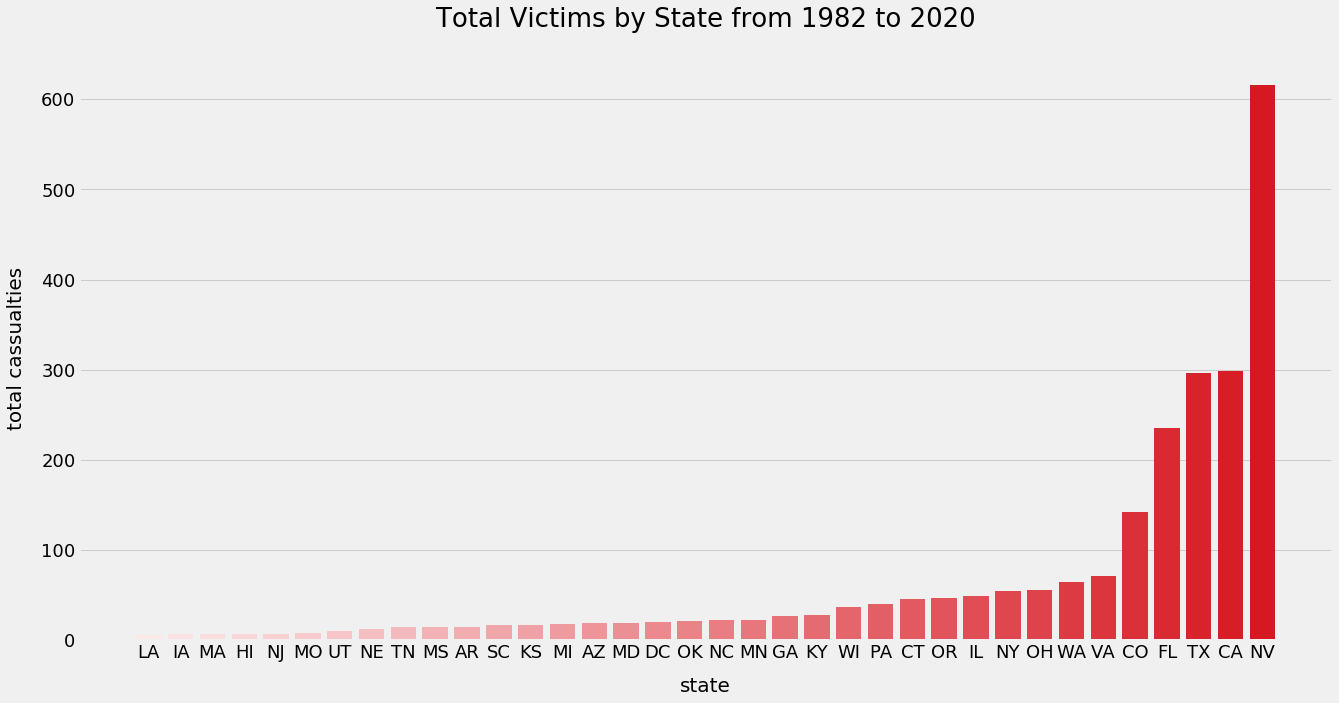

In [54]:
#set style
plt.style.use('fivethirtyeight')

#create figure and ax
f, ax = plt.subplots(figsize=(20, 10))

#set color
bar_colors = sns.light_palette("#d61822",36)

#plot data
plt.bar(tvictims_by_state.state_code, tvictims_by_state.total_victims, color = bar_colors, width = 0.8)

ax.tick_params(axis="x", labelsize=18)
ax.tick_params(axis="y", labelsize=18)

ax.xaxis.grid(False) #remove vertical lines for a cleaner visualisation

#labels and title
plt.xlabel('state', labelpad=15, fontsize = 20)
plt.ylabel('total cassualties', labelpad=15, fontsize = 20)
plt.title('Total Victims by State from 1982 to 2020', pad=30, fontsize=26)

plt.show()

### 2nd Visualization (GEO)

In [55]:
#prepare data for geomap
geo_data_sumcolumns = ['total_victims','fatalities', 'injured'] #columns we plan to sum up
geo_data = df.groupby(['state_code','state'])[geo_data_sumcolumns].sum().sort_values(by='total_victims').reset_index()

In [56]:
geo_data.head()

,state_code,state,total_victims,fatalities,injured
0,LA,Louisiana,6,3,3
1,IA,Iowa,7,6,1
2,MA,Massachusetts,7,7,0
3,HI,Hawaii,7,7,0
4,NJ,New Jersey,7,4,3


In [57]:
geo_data['text'] = geo_data['state'] + '<br>' + \
                'Injured: ' + geo_data['injured'].astype(str) + '<br>' + \
                'Fatalities: ' + geo_data['fatalities'].astype(str)
                    

data = dict(type = 'choropleth', 
            locations = geo_data['state_code'], 
            locationmode = 'USA-states',  
            
            colorscale = [[0, '#ffa1a1'],
                          [0.05, '#ff655c'],
                          [0.4, '#fc4136'], 
                          [1, '#f20000']], #colorblind safe color pallete
            
            text = geo_data['text'], #hover text
            z = geo_data['total_victims'],
            hovertemplate = "<b>Total Victims: %{z}</b><br>" + "%{text}" +'<extra></extra>',
            zauto = True,
            zmax=620, zmin=150,
            autocolorscale=False,
            marker_line_color='white', #line markers between states
            colorbar = {'title': 'Total Victims'},
            reversescale = False, 
            showscale=False,
        )

layout = dict(geo = {'scope':'usa'}, template = 'plotly_white')
victims_map = go.Figure(data = [data], layout = layout)

victims_map.update_layout(
    title_text='<b>US Mass Shootings from 1982 to 2020 </b> <br>Total Victims by State</b><br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

iplot(victims_map)

## 2. Deadliest US Mass Shootings from 1982 to 2020 Visualization (using MAPBOX)

To see exactly where the deadliest shootings happened on the US map, we will use MAPBOX mapping platform and their geolocation API.
We'll need a mapbox access token, latitude and longitude coordonates.

In [58]:
mapbox_access_token = 'pk.eyJ1IjoiYW5kcmFtYXJhY2l1YyIsImEiOiJjazc0ZXVqYTYwbGNnM2tudnZnc3B1Y2lwIn0.lDDkLC3qCZfpH7swCmk6Iw'

site_lat = df.latitude
site_lon = df.longitude

hover_details = '<b>Location: </b>' + df.city + '<br>'\
                + '<b>Event: </b>' + df.case.str.title() + '<br>' \
                + '<b>Total Victims: </b>' + df.total_victims.astype(str) + '<br>' \
                + '<b>Injured: </b>' + df.injured.astype(str) + '<br>' \
                + '<b>Deaths: </b>' + df.fatalities.astype(str) + '<br>' \
                + '<b>Year: </b>' + df.year.astype(str) + '<br>' \
                
                
size_marker_guide = df.fatalities
data = [
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=dict(
            size=size_marker_guide,
            color= 'rgb(255, 0, 0)',
            reversescale = False,
            cmin = 0,
            cmax = 800,
        ),
        text=hover_details,
        hoverinfo= 'text'
    ),
]
layout = go.Layout(
    title='<b>1982 - 2020 Deadliest US Mass Shootings </b><br>(Hover for breakdown)',
    #autosize=True,
    template = 'ggplot2',
    hovermode='closest',
    showlegend=False,
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=38,
            lon=-94,
        ),
        pitch=0,
        zoom=3,
        style='light',
                
    ),
)

fig = dict(data=data, layout=layout)

iplot(fig)

The deadliest shootings were the Las Vegas Strip with 58 fatalities, followed by the Orlando Nightclub Massacre with 49 deaths and Virgina Tech Massacre with 55 total fatalities.

## 3. Total Number of Mass Shootings by State (1982 - 2020)

In [59]:
#Group by state and count shootings
tshootings_by_state = df.groupby('state_code')['case'].count().sort_values(ascending=False).reset_index()
tshootings_by_state.rename(columns={'case':'number_of_incidents'}, inplace=True)

print("\nStates with most mass shootings:".upper())
tshootings_by_state.head()


STATES WITH MOST MASS SHOOTINGS:


,state_code,number_of_incidents
0,CA,20
1,FL,12
2,TX,11
3,WA,7
4,CO,6


### Question: Which state had the most mass shootings?

<b>California</b> has had the most mass shooting events, with a total of <b>20 shootings</b> since 1982, followed by <b>Florida</b> with 12 total shootings, and <b>Texas</b> with 11 shootings. <br>

<i>*Conclusions based on data covering events that happened between 1982-2020.</i>

## 4. Total Number of Mass Shootings by Year (1982 - 2020)

In [60]:
#prepare data for analysis
shootings_per_year = df.groupby('year')['case'].count().reset_index() #group shootings by year
shootings_per_year.rename(columns={'case':'shootings'}, inplace=True)

print("\nTotal Number of Mass Shootings by Year:".upper())
shootings_per_year


TOTAL NUMBER OF MASS SHOOTINGS BY YEAR:


,year,shootings
0,1982,1
1,1984,2
2,1986,1
3,1987,1
4,1988,1
5,1989,2
6,1990,1
7,1991,3
8,1992,2
9,1993,4


### Number of Shootings by Year Visualization

In [61]:
colorscales = [[0, '#ff4040'], [0.5, '#d72d2a'],[0.8,'#af1916'],[1,'#8a0000']]

fig = px.bar(shootings_per_year, y='shootings', x='year', text='shootings', title='Number of Incidents by Year', template='gridon', color_continuous_scale=colorscales)
fig.update_traces(texttemplate='%{text:.2}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', yaxis_title="total number of mass shootings",
    xaxis_title="year",
        xaxis=dict(
        #tickmode='linear',
        ticks='outside',
        tick0=0,
        ticklen=4,
        tickwidth=2,
        tickcolor='#000'
    ))

fig.show()


#### Question: Are mass shootings on the rise? What was the year with most mass shootings?

Yes, they are. The number of mass shootings is rapidly increasing, especially in the last decade, <b> 2018</b> being the year with the most shootings, with a total of 12 shootings. <br>


## 5. Annual Mass Shootings Cassualities | Total Victims and Deaths

In [62]:
#Create a dataframe with total victims (v), fatalities (f), injured (i) grouped by year
vfi_sumcolumns = ['total_victims','fatalities','injured'] #columns that need to be sumed
vfi_by_year = df.groupby(['year'])[vfi_sumcolumns].sum().reset_index() 

In [63]:
print("\nTotal shootings Cassualties by Year:".upper())
vfi_by_year


TOTAL SHOOTINGS CASSUALTIES BY YEAR:


,year,total_victims,fatalities,injured
0,1982,11,8,3
1,1984,48,28,20
2,1986,21,15,6
3,1987,20,6,14
4,1988,11,7,4
5,1989,56,15,41
6,1990,14,10,4
7,1991,61,35,26
8,1992,19,9,10
9,1993,57,23,34


### 5.1  Total Victims and Deaths | Data Visualization

In [64]:
fig = plt.figure(figsize=(20,5))

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=vfi_by_year.year, y=vfi_by_year.total_victims,
                    mode='lines',
                    name='total victims',
                    line=dict(color='royalblue', width=3))),
fig.add_trace(go.Scatter(x=vfi_by_year.year, y=vfi_by_year.fatalities,
                    mode='lines+markers',
                    name='deaths',
                    line=dict(color='firebrick', width=3))),

fig.update_layout(
    barmode='stack',
    title='<b>Mass Shootings Total Victims and Fatalities Over Time</b>',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='casualties',
        titlefont_size=16,
        tickfont_size=14,
    ),
    template='plotly_white',
    legend=dict(
        x=0.1,
        y=0.9,
        bgcolor='#FFFFFF',
        bordercolor='#a0a0a0'
    ))

<Figure size 1440x360 with 0 Axes>

## 6. Annual Mass Shootings Cassualities | Deaths and Injured

In [65]:
fig = go.Figure(data=[
    go.Bar(name='Fatalities', x=vfi_by_year.year, y=vfi_by_year.fatalities,marker_color='#d61822'),
    go.Bar(name='Injured', x=vfi_by_year.year, y=vfi_by_year.injured, marker_color='#ffb53a')
])
# Change the bar mode
fig.update_layout(
    barmode='stack',
    title='<b>Annual mass shootings casualties</b><br>(Hover for breakdown)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='casualties',
        titlefont_size=16,
        tickfont_size=14,
    ),
    template='plotly_white',
    legend=dict(
        x=0.1,
        y=0.9,
        bgcolor='#FFFFFF',
        bordercolor='#a0a0a0'
    ),
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
                 )
fig.show()

Clearly, <b>2017 was the year with most casualties </b> from mass shootings: 
- 587 injured
- 117 fatalities

## 7. The Worst Mass Shootings in US until 2020

In [66]:
#prepare the dataframe
deadliest_mass_shootings = df.sort_values(by='fatalities', ascending=False).head(5).reset_index()

#capitalize values in 'case' column
deadliest_mass_shootings['case'] = deadliest_mass_shootings['case'].str.title()

In [67]:
print("\nThe Worst Mass Shootings in US:".upper())
deadliest_mass_shootings[['case','year','total_victims','fatalities','injured']]


THE WORST MASS SHOOTINGS IN US:


,case,year,total_victims,fatalities,injured
0,Las Vegas Strip Massacre,2017,604,58,546
1,Orlando Nightclub Massacre,2016,102,49,53
2,Virginia Tech Massacre,2007,55,32,23
3,Sandy Hook Elementary Massacre,2012,29,27,2
4,Texas First Baptist Church Massacre,2017,46,26,20


### 7.1 Worst Mass Shootings in US until 2020 | Data Visualization

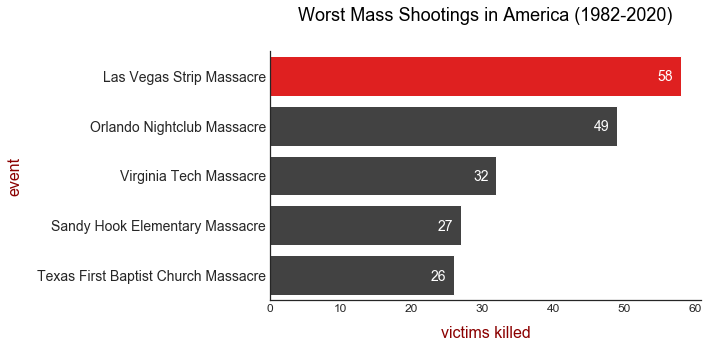

In [68]:
#set seaborn style
sns.set(style="ticks")

#plt style
plt.style.use('seaborn-white')

#initialize figure
f, ax = plt.subplots(figsize=(10,5))

#font
font = {'family': 'sans',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

#color for highest value
clrs = ['#424242' if (x < max(deadliest_mass_shootings.fatalities)) else '#ff0000' for x in deadliest_mass_shootings.fatalities ]


#plot the total fatalities
sns.barplot(x='fatalities', y='case', data=deadliest_mass_shootings, label='Total Deaths', palette=clrs)

#annotation
for p in ax.patches:
    width = p.get_width()
    ax.text(width - 2.2  ,
            p.get_y()+p.get_height()/2.+0.1,
            '{:1.0f}'.format(width),
            ha="center",fontsize=14,color='white')
    
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=14)


#labeling
plt.xlabel('victims killed', labelpad=12, fontsize=16, fontdict=font)
plt.ylabel('event', labelpad=15, fontsize=16, fontdict=font)
plt.title('Worst Mass Shootings in America (1982-2020)', pad=30, fontsize=18, color='black', fontdict=font)
 


sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)

plt.tight_layout()

plt.show()


## 8. Mass Shootings By Gender

In [69]:
shootings_by_gender = df.groupby('gender')['case'].count().reset_index()
shootings_by_gender.rename(columns={'case':'shootings'},inplace=True)

In [70]:
print("\nShootings by Gender:".upper())
shootings_by_gender


SHOOTINGS BY GENDER:


,gender,shootings
0,Female,3
1,Male,113
2,Male & Female,2


###  96% of shooters were men

112 mass shootings have been carried out in the USA by male shooters and only three mass shootings have been carried out by women.
95.7 % of the mass killers were men, while only 2.56% were women. 1.71% of the shootings had 2 authors both a male and a female.

### 8.1. Shootings by Gender | Pie Chart Visualization

In [71]:
plt.style.use('fivethirtyeight')

colors = ["#ffb53a","#e02a26", "#7c7c7c" ]
fig = px.pie(shootings_by_gender, values='shootings', names='gender', hole = .5, title='<b>Shootings By Gender</b>', template='plotly_white'
                                           )
fig.update_traces(textposition='outside', textinfo='percent+label',marker=dict(colors=colors))
fig.show()

## 9. Were the weapons used in shootings obtained legally?

In [72]:
weapons_obtained = df.weapons_obtained_legally.value_counts().reset_index()

weapons_obtained.rename(columns={'index':'answer'},inplace=True)
weapons_obtained.rename(columns={'weapons_obtained_legally':'count'},inplace=True)

print("\nWere the weapons obtained legally?:".upper())
weapons_obtained.head()


WERE THE WEAPONS OBTAINED LEGALLY?:


,answer,count
0,Yes,81
1,Unknown,19
2,No,16
3,\r\nYes,2


### 70% of the weapons used in the mass shootings were obtained legally. 

In [73]:
#calculate the percentage of weapons obtained legally
percentage_weapons = df.weapons_obtained_legally.value_counts(normalize=True) * 100
percentage_weapons

Yes        68.644068
Unknown    16.101695
No         13.559322
\r\nYes     1.694915
Name: weapons_obtained_legally, dtype: float64

### 9.1. Waffle Chart Visualization using Pywaffle

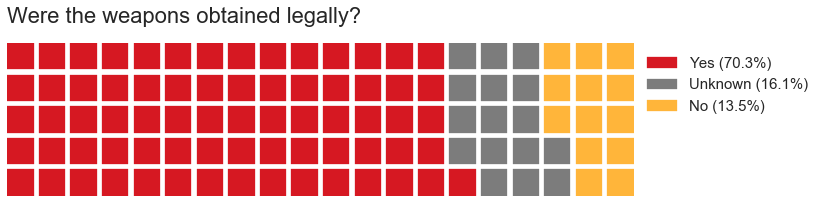

In [74]:
weapons = {'Yes': 70.3, 'Unknown':16.1, 'No':13.5}

plt.style.use('seaborn')

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=weapons, 
    colors=("#d61822", "#7c7c7c", "#FFB53A"),
    title={'label': 'Were the weapons obtained legally?', 'loc': 'left', 'fontsize': 22, 'pad':20},
    labels=["{0} ({1}%)".format(k, v) for k, v in weapons.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'ncol': len(data), 'fontsize': 15, 'framealpha': 0},
    tight=False,
    figsize=(10, 5)
)
fig.set_facecolor('white')
plt.show()

## 10. Age of the Shooters Analysis

#### Question: What was the youngest shooter?

The youngest shooter was <b> 11 years old</b>, named Andrew Douglas Golden. In 1998 together with Mitchell Scott Johnson, 13, two juveniles, ambushed students and teachers as they left the school and killed 5 people and wounded 10.

In [75]:
age = df.age
age.min() #find the lowest value in the age column

11

In [76]:
df[df['age'] == 11]

,case,date,summary,fatalities,injured,total_victims,shooting_area,age,prior_signs_mental_health_issues,weapons_obtained_legally,...,weapon_details,race,gender,latitude,longitude,type,year,state,state_code,city
93,Westside Middle School killings,3/24/1998,"Mitchell Scott Johnson, 13, and Andrew Douglas...",5,10,15,School,11,No,No,...,"FIE 380, .380-caliber Star semiautomatic handg...",White,Male,35.82099,-90.668261,Mass,1998,Arkansas,AR,Jonesboro


#### Question: What was the oldest shooter?

The oldest shooter William D. Baker, <b>66 years old</b>, opened fire in 2001 at his former Navistar workplace, killed 5 people and injured 4, and then commited suicide.

In [77]:
age.max() #find the lowest value in the age column

66

In [78]:
df[df['age'] == age.max()]

,case,date,summary,fatalities,injured,total_victims,shooting_area,age,prior_signs_mental_health_issues,weapons_obtained_legally,...,weapon_details,race,gender,latitude,longitude,type,year,state,state_code,city
85,Navistar shooting,2/5/2001,"Fired employee William D. Baker, 66, opened fi...",5,4,9,Workplace,66,No,Yes,...,"SKS 1954R, .30-caliber Winchester rifles; 12-g...",Black,Male,41.908163,-87.879908,Mass,2001,Illinois,IL,Melrose Park


### 10.1. Age Distribution

From the distribution below we can see that most mass killers had between 20-50 years old. 

<b>Most mass shooters were in their 40s.</b>

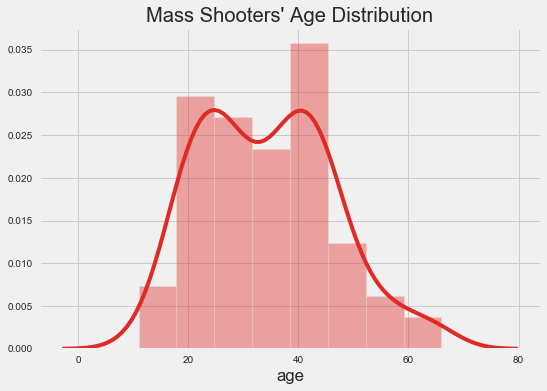

In [79]:
plt.style.use('fivethirtyeight')
plt.title("Mass Shooters' Age Distribution")
ax = sns.distplot(age, norm_hist=True, color='#e02a26')

Text(0, 0.5, 'count')

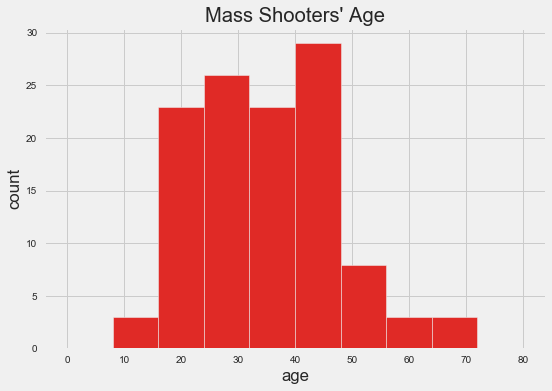

In [80]:
plt.style.use('fivethirtyeight')
plt.hist(age, range=(0,80), color='#e02a26')
plt.title("Mass Shooters' Age")
plt.xlabel('age')
plt.ylabel('count')

## 11. Shootings by Race

In [81]:
race = df.race.value_counts().reset_index()
race.rename(columns={'race':'shootings','index':'race'}, inplace=True)
print("\nShootings by Race (1982-2020):".upper())
race


SHOOTINGS BY RACE (1982-2020):


,race,shootings
0,White,65
1,Black,21
2,Latino,10
3,Other,10
4,Asian,8
5,Native American,3
6,Unknown,1


In [82]:
df.race.value_counts(normalize=True) * 100 #find the race percentage

White              55.084746
Black              17.796610
Latino              8.474576
Other               8.474576
Asian               6.779661
Native American     2.542373
Unknown             0.847458
Name: race, dtype: float64

## More than half (55%) of mass shooters were white.

55% of the attackers were white, 17.7% were black and 8.4% were latino.

### 11.1 Shootings by Race | Data Visualization

In [83]:
fig = px.bar(race, x='race', y='shootings')

fig.update_traces(texttemplate='<b>%{y:.2}</b>',  marker_color='#e02a26',textposition='outside')

fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', yaxis_title="number of incidents", title='<b>Shootings by Race</b>',
    xaxis_title="race",
        xaxis=dict(
        #tickmode='linear',
        ticks='outside',
        tick0=0,
        ticklen=4,
        tickwidth=2,
        tickcolor='#000'
    ), 
        template='gridon')

fig.show()


## 12. Shooting Area 

#### Question: How many school shootings have been since 1982?

There were 16 school shootings since 1982. 

In [84]:
shooting_location = df.shooting_area.value_counts().reset_index()
shooting_location.rename(columns={'shooting_area':'incidents','index':'area'}, inplace=True)

fig = px.bar(shooting_location, x='area', y='incidents')

fig.update_traces(texttemplate='<b>%{y:.2}</b>',  marker_color='#e02a26',textposition='outside')

fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', yaxis_title="number of incidents", title='Shootings Incident Locations',
    xaxis_title="shooting area",
        xaxis=dict(
        #tickmode='linear',
        ticks='outside',
        tick0=0,
        ticklen=4,
        tickwidth=2,
        tickcolor='#000'), 
                 )

fig.show()
